In [1]:
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import gridspec
import scipy
style.use('ggplot')
import datetime
from io import StringIO
import re
import numpy as np
from datetime import datetime
import math
from matplotlib.texmanager import TexManager


sns.set_style('whitegrid')
sns.set_palette('colorblind')
FIG_SIZE = (12, 3)
TexManager.font_info['Times New Roman'] = ('Times New Roman', r'\usepackage{Times New Roman}')

font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 30}
plt.rc('font', **font)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['text.usetex'] = True

plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['axes.labelsize']= 22
plt.rcParams['lines.linewidth']= 2
plt.rcParams['lines.markersize']= 2

Data is available in:
    
    https://sandbox.zenodo.org/record/143152/files/npm_analysis_data.zip


In [188]:
import numpy as np
import sklearn 
from  sklearn.decomposition import FactorAnalysis
from  sklearn.decomposition import PCA
from sklearn import datasets

In [214]:
librariesio=npm_packages.loc[:,['depPro','depRepo','communityInterest','dependentsCount','downloadsCount','downloadsAcceleration']]

In [184]:
iris= datasets.load_iris()
X=iris.data
variable_names= iris.feature_names
variable_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [220]:
0.003203+0.919789-0.355648-0.087939-0.140567+0.000229

0.33906699999999984

In [215]:
variable_names=librariesio.columns
pca= PCA()
inis_pca= pca.fit_transform(librariesio)
pca.explained_variance_ratio_

array([  9.99980224e-01,   1.07862788e-05,   6.44843823e-06,
         2.32036446e-06,   1.95720369e-07,   2.54542729e-08])

In [216]:
pca.explained_variance_ratio_.sum()

1.0

In [217]:
comps=pd.DataFrame(pca.components_,columns= variable_names)
comps

,depPro,depRepo,communityInterest,dependentsCount,downloadsCount,downloadsAcceleration
0,0.000155,0.003203,0.000295,0.000091,0.999992,0.002179
1,0.130348,0.919789,0.362493,0.024563,-0.002922,-0.070598
2,-0.048452,-0.355648,0.931527,-0.004700,0.000745,0.058333
3,-0.002329,-0.087939,0.028744,0.020223,0.002441,-0.995500
4,0.976702,-0.140567,-0.002886,0.161578,0.000256,0.013332
5,-0.163429,0.000229,-0.004706,0.986336,-0.000108,0.020263


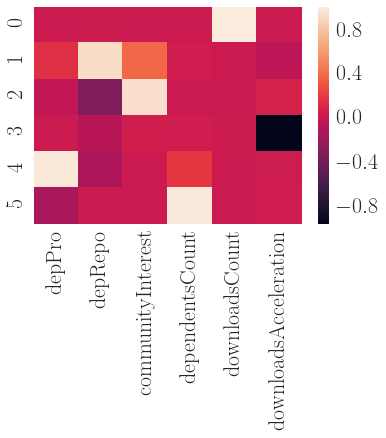

In [218]:
sns.heatmap(comps)

In [190]:
factor= FactorAnalysis().fit(X)
pd.DataFrame(factor.components_,columns= variable_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.707227,-0.153147,1.653151,0.701569
1,0.114676,0.159763,-0.045604,-0.014052
2,-0.000000,0.000000,0.000000,0.000000
3,-0.000000,0.000000,0.000000,-0.000000


# Prepare the dataframe DATA_NPM_FINAL: contains all data about the packages

In [3]:
# Already prepared the data for the NPM_FINAL dataframe
npm_packages=pd.read_csv('../../saner2018/csv/npm_packages_jan_final.csv', sep=';', dtype=object, index_col='name')
npm_packages.head(1)

,tests,carefulness,health,branding,communityInterest,dependentsCount,downloadsCount,downloadsAcceleration,releasesFrequency,commitsFrequency,openIssues,issuesDistribution,depPro,depRepo,releases,lastRelease,dependencies,firstRelease,size
name,,,,,,,,,,,,,,,,,,,
007,0.85,0.165,1,0,24,0,190.666666667,0.658904109589,0,0,0.777777777778,0,1.0,1.0,3.0,1628.0,0.0,1631.0,75.2


# Informations about the evolution* of npm growth

In [365]:
npm_versions=pd.read_csv('../icsr2018/csv/graph_version.csv',
                                sep=';', dtype=object, index_col=None)
npm_versions['date']=npm_versions['version_date'].apply(lambda x: x.split('-')[0])
#npm_versions['date'] = pd.to_datetime(npm_versions['date'], format='%Y-%m')

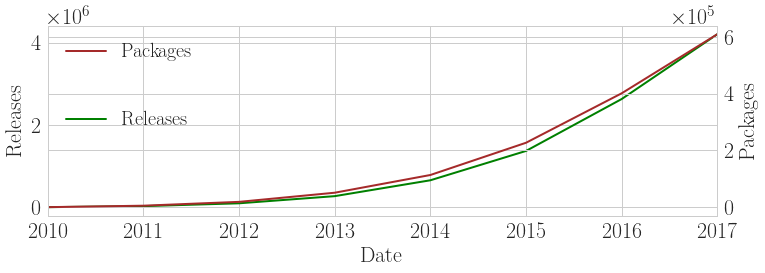

In [373]:
npm_count=npm_versions.groupby('date').count()
npm_count_packs=npm_versions.query('version_type=="first_release"').groupby('date').count()

npm_count['Releases']=npm_count['package'].cumsum()
npm_count_packs['Packages']=npm_count_packs['package'].cumsum()


fig, ax1 = plt.subplots()
ax1.plot(npm_count.Releases, color='green')
ax1.figure.set_size_inches(12,3.5)

ax1.legend(
   loc='center left',
   fontsize=20)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.set_ylabel('Releases')
ax1.set_xlim('2010','2017')

ax2 = ax1.twinx()
ax2.plot(npm_count_packs.Packages, color='brown')
ax2.set_xlim('2010','2017')
ax1.figure.set_size_inches(12,3.5)
ax2.set_ylabel('Packages')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.legend(
   loc='upper left',
   fontsize=20)
ax1.set_xlabel('Date')
#ax2.set_ylim(0,500000)
ax2.figure.savefig('../../seneca_research/MSR2018/figures/evolution_npm.png', bbox_inches='tight', facecolor='white')

# Empirical Analysis: Popularity measures

In [4]:
for x in npm_packages:
    try:
        npm_packages[x]=npm_packages[x].apply(float)
    except:
        print(x)
        pass

In [140]:
librariesio=npm_packages.query('dependencies>=0').loc[:,['depPro','depRepo','communityInterest','dependentsCount','downloadsCount','downloadsAcceleration']]
for param1 in librariesio:
    for param2 in librariesio:
        print(param1, param2, cliffsDelta(librariesio[param1],librariesio[param2]))

d=0.0 False
depPro depPro False
d=0.08346745271506871 False
depPro depRepo False
d=-0.7354437854827259 True
depPro communityInterest True
d=0.2901703078108484 True
depPro dependentsCount True
d=-0.9492388632909642 True
depPro downloadsCount True
d=0.6343061716427632 True
depPro downloadsAcceleration True
d=-0.08346745271506871 False
depRepo depPro False
d=0.0 False
depRepo depRepo False
d=-0.6914456183948343 True
depRepo communityInterest True
d=0.18257162697575344 True
depRepo dependentsCount True
d=-0.8935564944794846 True
depRepo downloadsCount True
d=0.5870517976970777 True
depRepo downloadsAcceleration True
d=0.7354437854827259 True
communityInterest depPro True
d=0.6914456183948343 True
communityInterest depRepo True
d=0.0 False
communityInterest communityInterest False
d=0.8613316639995388 True
communityInterest dependentsCount True
d=-0.6765913939585232 True
communityInterest downloadsCount True
d=0.8785566446788756 True
communityInterest downloadsAcceleration True
d=-0.2901703

In [176]:
for x in librariesio:
    print(scipy.stats.normaltest(librariesio[x]))

NormaltestResult(statistic=19965.860429389388, pvalue=0.0)
NormaltestResult(statistic=28094.148734346018, pvalue=0.0)
NormaltestResult(statistic=5087.306020834334, pvalue=0.0)
NormaltestResult(statistic=14936.740920147489, pvalue=0.0)
NormaltestResult(statistic=31556.143080367889, pvalue=0.0)
NormaltestResult(statistic=30032.094336342521, pvalue=0.0)


In [192]:
librariesio=npm_packages.loc[:,['depPro','depRepo','communityInterest','dependentsCount','downloadsCount','downloadsAcceleration']]
for col in librariesio:
    max1=math.log(librariesio[col].max())
    try:
        min1=math.log(librariesio[col].min())
    except:
        min1=0
    librariesio[col]=librariesio[col].apply(
    #    lambda x: float((math.log(float(x)))/(math.log(max1))) if x>0 else 0)
        lambda x: float((math.log(x)-min1)/(max1-min1)) if x>= 1 else 0)
for param1 in librariesio:
    for param2 in librariesio:
        print(param1+'------'+ param2,scipy.stats.kendalltau(librariesio[param1],librariesio[param2])[0])

depPro------depPro 1.0
depPro------depRepo 0.581572339118
depPro------communityInterest 0.199295777735
depPro------dependentsCount 0.586119583782
depPro------downloadsCount 0.296263993781
depPro------downloadsAcceleration 0.243161570212
depRepo------depPro 0.581572339118
depRepo------depRepo 1.0
depRepo------communityInterest 0.316606324798
depRepo------dependentsCount 0.582840687223
depRepo------downloadsCount 0.419858417941
depRepo------downloadsAcceleration 0.341242307094
communityInterest------depPro 0.199295777735
communityInterest------depRepo 0.316606324798
communityInterest------communityInterest 1.0
communityInterest------dependentsCount 0.231576440524
communityInterest------downloadsCount 0.323130118255
communityInterest------downloadsAcceleration 0.23846762681
dependentsCount------depPro 0.586119583782
dependentsCount------depRepo 0.582840687223
dependentsCount------communityInterest 0.231576440524
dependentsCount------dependentsCount 1.0
dependentsCount------downloadsCount 

In [ ]:
datetime.dat

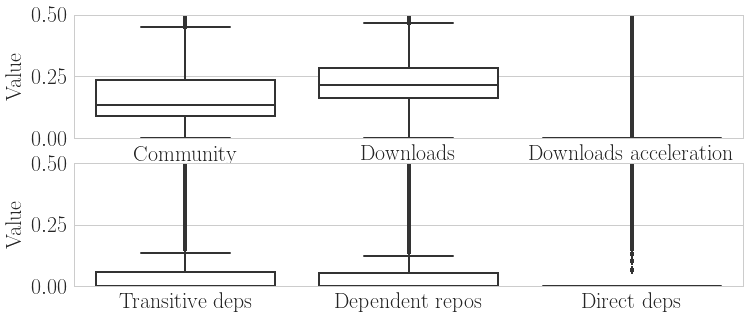

In [204]:
librariesio=npm_packages.loc[:,['depPro','depRepo','communityInterest','dependentsCount','downloadsCount','downloadsAcceleration']]

for col in librariesio:
    max1=math.log(librariesio[col].max())
    try:
        min1=math.log(librariesio[col].min())
    except:
        min1=0
    librariesio[col]=librariesio[col].apply(
    #    lambda x: float((math.log(float(x)))/(math.log(max1))) if x>0 else 0)
        lambda x: float((math.log(x)-min1)/(max1-min1)) if x>= 1 else 0)
    
fig, axes = plt.subplots(2, 1, sharex=False, sharey=True)

npm_packages_only3=librariesio.loc[:,['communityInterest','downloadsCount','downloadsAcceleration']]
npm_packages_only3.rename(columns = {'communityInterest':'Community', 'downloadsCount':'Downloads','downloadsAcceleration':'Downloads acceleration'}, inplace=True)

npm_packages_only3=pd.melt(npm_packages_only3)
ax=sns.boxplot( ax=axes[0], y="value", x="variable", data=npm_packages_only3, color='white', saturation=0.5)#, split=True)#, order=order)    
ax.set_xlabel('')
ax.set_ylim(0,0.5)
plt.setp(ax.lines, color=".2", mfc='.2', mec='.2')
for x in ax.artists:
    x.set_edgecolor('.2')
ax.set_ylabel('Value')
npm_packages_only3=librariesio.loc[:,['depPro','depRepo','dependentsCount']]
npm_packages_only3.rename(columns = {'depPro':'Transitive deps', 'depRepo':'Dependent repos','dependentsCount':'Direct deps'}, inplace=True)

npm_packages_only3=pd.melt(npm_packages_only3)
ax=sns.boxplot(ax=axes[1], y="value", x="variable", data=npm_packages_only3, color='white', saturation=0.5)#, split=True)#, order=order)    
ax.set_xlabel('')
ax.set_ylim(0,0.5)
plt.setp(ax.lines, color=".2", mfc='.2', mec='.2')
for x in ax.artists:
    x.set_edgecolor('.2')
ax.figure.set_size_inches(12,5)#
ax.set_ylabel('Value')

ax.figure.savefig('../../seneca_research/MSR2018/figures/popularity_dists.png', bbox_inches='tight', facecolor='white')

In [199]:
>>> import datetime
>>> a = datetime.datetime.now()
>>> b = datetime.datetime.now()
>>> c = b - a
datetime.timedelta(0, 8, 562000)
>>> divmod(c.days * 86400 + c.seconds, 60)
(0, 8)      # 0 minutes, 8 seconds

(0, 8)

In [334]:
len(npm_packages.query('downloadsCount>1000'))/len(npm_packages)

0.10847783934473741

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


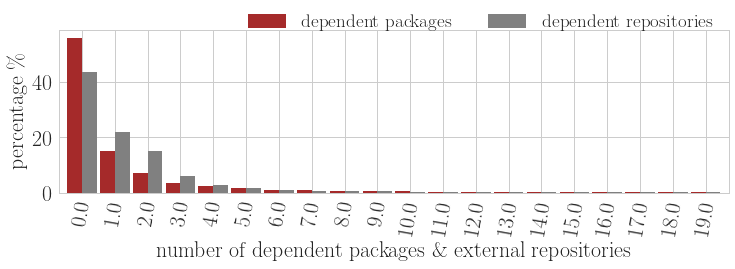

In [106]:
npm_packages_only3=npm_packages.loc[:,['dep_pro','dep_repo']]
a=npm_packages_only3.groupby('dep_pro').count()
b=npm_packages_only3.groupby('dep_repo').count()
ab=pd.concat([a,b], axis=1)
for y in ab:
    ab[y]=ab[y].apply(lambda x: x*100/len(npm_packages))
ab.rename(columns = {'dep_pro':'dependent packages', 'dep_repo':'dependent repositories'}, inplace=True)

ax=ab.head(20).plot(kind='bar', color=['brown','gray','purple'], y=['dependent packages','dependent repositories'], width=0.9)
ax.set_ylabel('percentage \%')
ax.set_xlabel('number of dependent packages \& external repositories ')
ax.legend( loc='upper right', 
          bbox_to_anchor=(1, 1.2), fontsize=19,ncol=3, fancybox=True, shadow=True)
plt.xticks(rotation='80')
#ax.set_yscale('log')
ax.figure.set_size_inches(12,3)

In [193]:
import math
npm_packages_only3=npm_packages.loc[:,['dep_repo','dep_pro']]
#npm_packages_only3=npm_packages_only3.query('dep_pro!=0 or dep_repo!=0')
#npm_packages_only3.rename(columns = {'dep_pro':'dependent packages', 'dep_repo':'dependent repositories'}, inplace=True)
npm_packages_only3['dep_repo']=npm_packages_only3.dep_repo.apply(lambda x: float((math.log(float(x)))/(math.log(53865001.3333))) if x>1
                                                      else 0)
npm_packages_only3['dep_pro']=npm_packages_only3.dep_pro.apply(lambda x: float((math.log(float(x)))/(math.log(226481.784228))) if x>0
                                                      else 0)

color_map = plt.cm.Spectral_r
df=npm_packages_only3.sort_values(['dep_repo'],ascending=False)
#ax=df.plot( s=5, kind="scatter", y='requiredBy',x='popularity', linewidth=1, color='brown')


fig=plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)

image = plt.hexbin(data=df, x='dep_repo', y='dep_pro',cmap=color_map,gridsize=500,mincnt=1,bins='log')

cb = plt.colorbar(image,spacing='uniform',extend='max')

#z = np.polyfit(df['downloadsCount'], df['downloadsAcceleration'], 2)
#p = np.poly1d(z)
#plt.plot(df['downloadsCount'],p(df['downloadsCount']),"brown", linestyle='--', linewidth=5)

ax.figure.set_size_inches(12,3)
ax.set_ylim(0,0.75)
ax.set_xlim(0,0.75)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('dep repo')
ax.set_ylabel('dependentsCount')

KeyError: "None of [['dep_repo', 'dep_pro']] are in the [columns]"

Text(0,0.5,'Downloads acceleration')

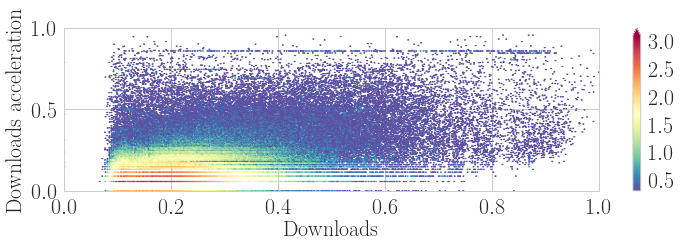

In [198]:
import math
npm_packages_only3=npm_packages.loc[:,['communityInterest','downloadsCount']]
var1='communityInterest'
var2='downloadsCount'
max1=math.log(npm_packages_only3[var1].max())
max2=math.log(npm_packages_only3[var2].max())
try:
    min1=math.log(npm_packages_only3[var1].min())
except:
    min1=0
try:
    min2=math.log(npm_packages_only3[var2].min())
except:
    min2=0
npm_packages_only3[var1]=npm_packages_only3[var1].apply(
#    lambda x: float((math.log(float(x)))/(math.log(max1))) if x>0 else 0)
    lambda x: float((math.log(x)-min1)/(max1-min1)) if x>= 1 else 0)
npm_packages_only3[var2]=npm_packages_only3[var2].apply(
#    lambda x: float((math.log(float(x)))/(math.log(max2))) if x>1 else 0)
    lambda x: float((math.log(x)-min2)/(max2-min2)) if x>= 1 else 0)

color_map = plt.cm.Spectral_r
df=npm_packages_only3.sort_values(['downloadsCount'],ascending=False)
#ax=df.plot( s=5, kind="scatter", y='requiredBy',x='popularity', linewidth=1, color='brown')


fig=plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)

image = plt.hexbin(data=df, x='downloadsCount', y='communityInterest',cmap=color_map,gridsize=500,mincnt=1,bins='log')

cb = plt.colorbar(image,spacing='uniform',extend='max')

#z = np.polyfit(df['downloadsCount'], df['downloadsAcceleration'], 2)
#p = np.poly1d(z)
#plt.plot(df['downloadsCount'],p(df['downloadsCount']),"brown", linestyle='--', linewidth=5)

ax.figure.set_size_inches(12,3)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('Downloads')
ax.set_ylabel('Downloads acceleration')

Text(0,0.5,'dependentsCount')

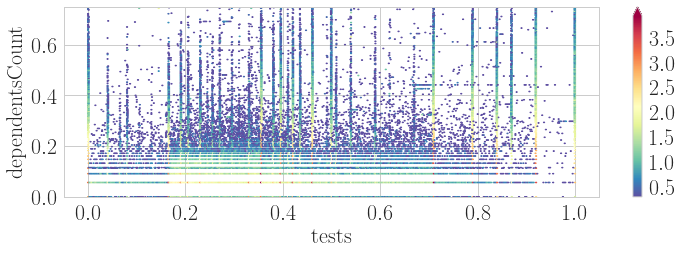

In [491]:
import math
npm_packages_only3=npm_packages.loc[:,['carefulness','communityInterest']]
#npm_packages_only3=npm_packages_only3.query('dep_pro!=0 or dep_repo!=0')
#npm_packages_only3.rename(columns = {'dep_pro':'dependent packages', 'dep_repo':'dependent repositories'}, inplace=True)
maxx=npm_packages_only3.communityInterest.max()
npm_packages_only3['communityInterest']=npm_packages_only3.communityInterest.apply(lambda x: float((math.log(float(x)))/(math.log(maxx))) if x>0
                                                      else 0)


color_map = plt.cm.Spectral_r
#ax=df.plot( s=5, kind="scatter", y='requiredBy',x='popularity', linewidth=1, color='brown')


fig=plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)

image = plt.hexbin(data=npm_packages_only3, x='carefulness', y='communityInterest',cmap=color_map,gridsize=400,mincnt=1,bins='log')

cb = plt.colorbar(image,spacing='uniform',extend='max')

#z = np.polyfit(df['downloadsCount'], df['downloadsAcceleration'], 2)
#p = np.poly1d(z)
#plt.plot(df['downloadsCount'],p(df['downloadsCount']),"brown", linestyle='--', linewidth=5)

ax.figure.set_size_inches(12,3.5)
ax.set_ylim(0,0.75)
#ax.set_xlim(0,0.6)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel(' tests')
ax.set_ylabel('dependentsCount')

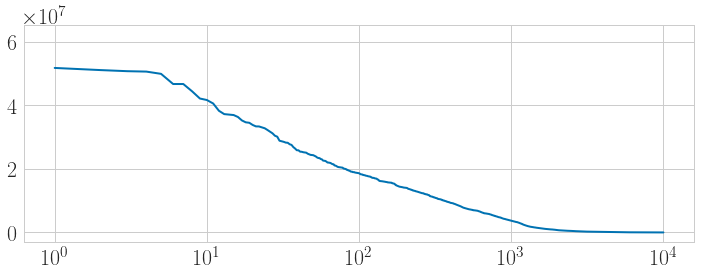

In [47]:
npm_packages['downloadsCount']=npm_packages['downloadsCount'].apply(float)
npm_packages=npm_packages.sort_values('downloadsCount', ascending=False)
#npm_packages.reset_index(inplace=True)
pp=npm_packages.head(10000)
ax=pp.downloadsCount.plot()
ax.set_xscale('log')
ax.figure.set_size_inches(12,4)

In [48]:
npm_packages=npm_packages[['name','downloadsCount']].drop_duplicates()

In [50]:
npm_packages.to_csv('../../../npm_packages_dowloads.csv', index=False, sep=';')
len(npm_packages)

289838

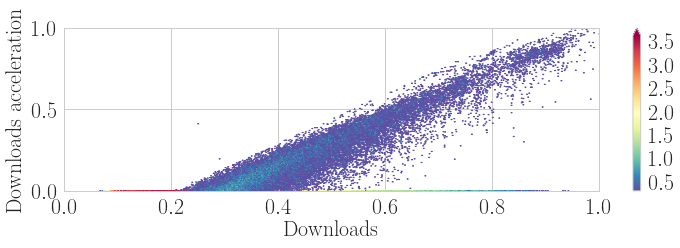

In [51]:
import math
npm_packages_only3=npm_packages.loc[:,['downloadsCount','downloadsAcceleration']]
var1='downloadsAcceleration'
var2='downloadsCount'
max1=math.log(npm_packages_only3[var1].max())
max2=math.log(npm_packages_only3[var2].max())
try:
    min1=math.log(npm_packages_only3[var1].min())
except:
    min1=0
try:
    min2=math.log(npm_packages_only3[var2].min())
except:
    min2=0
npm_packages_only3[var1]=npm_packages_only3[var1].apply(
#    lambda x: float((math.log(float(x)))/(math.log(max1))) if x>0 else 0)
    lambda x: float((math.log(x)-min1)/(max1-min1)) if x>= 1 else 0)
npm_packages_only3[var2]=npm_packages_only3[var2].apply(
#    lambda x: float((math.log(float(x)))/(math.log(max2))) if x>1 else 0)
    lambda x: float((math.log(x)-min2)/(max2-min2)) if x>= 1 else 0)

color_map = plt.cm.Spectral_r
df=npm_packages_only3.sort_values(['downloadsCount'],ascending=False)
#ax=df.plot( s=5, kind="scatter", y='requiredBy',x='popularity', linewidth=1, color='brown')


fig=plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)

image = plt.hexbin(data=df, x='downloadsCount', y='downloadsAcceleration',cmap=color_map,gridsize=500,mincnt=1,bins='log')

cb = plt.colorbar(image,spacing='uniform',extend='max')

#z = np.polyfit(df['downloadsCount'], df['downloadsAcceleration'], 2)
#p = np.poly1d(z)
#plt.plot(df['downloadsCount'],p(df['downloadsCount']),"brown", linestyle='--', linewidth=5)

ax.figure.set_size_inches(12,3)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('Downloads')
ax.set_ylabel('Downloads acceleration')
ax.figure.savefig('../../seneca_research/MSR2018/figures/downs_accel_corr.png', bbox_inches='tight', facecolor='white')

In [174]:
npm_packages_only3=npm_packages.loc[:,['downloadsCount','downloadsAcceleration']]

In [175]:
#Pearsonr R correlation
scipy.stats.pearsonr(npm_packages_only3.downloadsCount,
                     npm_packages_only3.downloadsAcceleration)

(0.81646413961386821, 0.0)

In [176]:
#Spearmanr R correlation
scipy.stats.spearmanr(npm_packages_only3.downloadsCount,
                     npm_packages_only3.downloadsAcceleration)

SpearmanrResult(correlation=-0.014805192670398148, pvalue=1.5737577212212896e-15)

In [134]:
npm_packages_only3=npm_packages.loc[:,['downloadsCount','downloadsAcceleration']]
npm_packages_only3.downloadsAcceleration.describe().apply(lambda x: format(x, 'f'))

count    298580.000000
mean        147.745007
std        2508.309768
min      -51833.182534
25%          -0.404875
50%          -0.134998
75%           0.053463
max      226481.784228
Name: downloadsAcceleration, dtype: object

Text(0,0.5,'community interest')

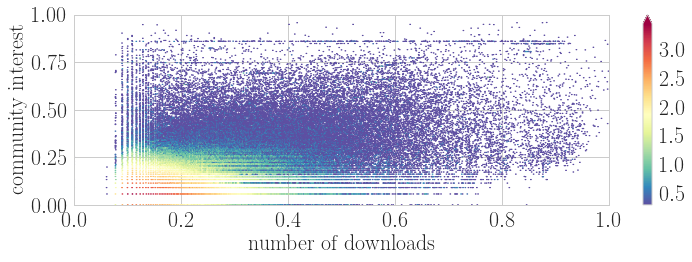

In [165]:
import math
npm_packages_only3=npm_packages.loc[:,['downloadsCount','communityInterest']]
max1=npm_packages_only3.communityInterest.max()
max2=npm_packages_only3.downloadsCount.max()
npm_packages_only3['downloadsCount']=npm_packages_only3.downloadsCount.apply(lambda x: float((math.log(int(x)))/(math.log(max2))) if x>1
                                                      else 0)
npm_packages_only3['communityInterest']=npm_packages_only3.communityInterest.apply(lambda x: float((math.log(int(x)))/(math.log(max1))) if x>1
                                                      else 0)

#npm_packages_only3['downloadsCount']=npm_packages_only3.downloadsCount.apply(lambda x: float(int(x)/53865001.3333) if x>1
 #                                                     else 0)
#npm_packages_only3['communityInterest']=npm_packages_only3.communityInterest.apply(lambda x: float(int(x)/177925) if x>1
 #                                                     else 0)

#npm_packages_only3=npm_packages_only3.query('dep_pro!=0 or dep_repo!=0')
#npm_packages_only3.rename(columns = {'dep_pro':'dependent packages', 'dep_repo':'dependent repositories'}, inplace=True)

color_map = plt.cm.Spectral_r
df=npm_packages_only3.sort_values(['downloadsCount'],ascending=False)
#ax=df.plot( s=5, kind="scatter", y='requiredBy',x='popularity', linewidth=1, color='brown')


fig=plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)

image = plt.hexbin(data=df, x='downloadsCount', y='communityInterest',cmap=color_map,gridsize=700,mincnt=1,bins='log')

cb = plt.colorbar(image,spacing='uniform',extend='max')

#z = np.polyfit(df['downloadsCount'], df['communityInterest'], 1)
#p = np.poly1d(z)
#plt.plot(df['downloadsCount'],p(df['downloadsCount']),"brown", linestyle='--', linewidth=5)

ax.figure.set_size_inches(12,3.5)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel('number of downloads')
ax.set_ylabel('community interest')

In [141]:
npm_packages_only3=npm_packages.loc[:,['downloadsCount','communityInterest']]

In [142]:
#Pearsonr R correlation
scipy.stats.pearsonr(npm_packages_only3.downloadsCount,
                     npm_packages_only3.communityInterest)

(0.11086342250057156, 0.0)

In [140]:
#Spearmanr R correlation
scipy.stats.spearmanr(npm_packages_only3.downloadsCount,
                     npm_packages_only3.communityInterest)

SpearmanrResult(correlation=0.45075017076295198, pvalue=0.0)

In [61]:
npm_packages_only3=npm_packages.loc[:,['downloadsCount','dep_repo']]
npm_packages_only3.dep_repo.describe().apply(lambda x: format(x, 'f'))

count    298580.000000
mean        185.053657
std        3340.364125
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max      468000.000000
Name: dep_repo, dtype: object

In [389]:
npm_packages_only3=npm_packages.loc[:,['downloadsCount','depRepo']]
npm_packages_only3.depRepo.max()

468000.0

Text(0,0.5,'Dependent repositories')

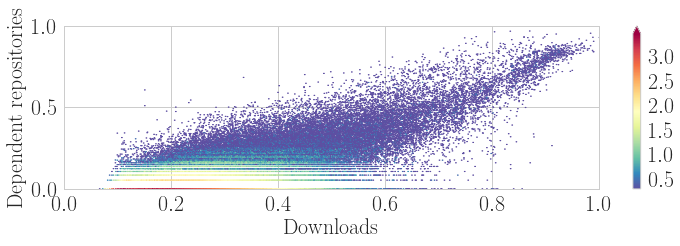

In [139]:
import math
npm_packages_only3=npm_packages.loc[:,['downloadsCount','depRepo']]
var1='depRepo'
var2='downloadsCount'
max1=math.log(npm_packages_only3[var1].max())
max2=math.log(npm_packages_only3[var2].max())
try:
    min1=math.log(npm_packages_only3[var1].min())
except:
    min1=0
try:
    min2=math.log(npm_packages_only3[var2].min())
except:
    min2=0
npm_packages_only3[var1]=npm_packages_only3[var1].apply(
#    lambda x: float((math.log(float(x)))/(math.log(max1))) if x>0 else 0)
    lambda x: float((math.log(x)-min1)/(max1-min1)) if x>= 1 else 0)
npm_packages_only3[var2]=npm_packages_only3[var2].apply(
#    lambda x: float((math.log(float(x)))/(math.log(max2))) if x>1 else 0)
    lambda x: float((math.log(x)-min2)/(max2-min2)) if x>=1 else 0)
#npm_packages_only3=npm_packages_only3.query('dep_pro!=0 or dep_repo!=0')
#npm_packages_only3.rename(columns = {'dep_pro':'dependent packages', 'dep_repo':'dependent repositories'}, inplace=True)

color_map = plt.cm.Spectral_r
df=npm_packages_only3.sort_values(['downloadsCount'],ascending=False)
#ax=df.plot( s=5, kind="scatter", y='requiredBy',x='popularity', linewidth=1, color='brown')

fig=plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)

image = plt.hexbin(data=df, x='downloadsCount', y='depRepo',cmap=color_map,gridsize=700,mincnt=1,bins='log')

cb = plt.colorbar(image,spacing='uniform',extend='max')

#z = np.polyfit(df['downloadsCount'], df['communityInterest'], 1)
#p = np.poly1d(z)
#plt.plot(df['downloadsCount'],p(df['downloadsCount']),"brown", linestyle='--', linewidth=5)

ax.figure.set_size_inches(12,3)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel('Downloads')
ax.set_ylabel('Dependent repositories')
#ax.figure.savefig('../../seneca_research/MSR2018/figures/downs_deps_repo_corr.png', bbox_inches='tight', facecolor='white')

In [155]:
npm_packages_only3=npm_packages.loc[:,['downloadsCount','dep_repo']]

In [156]:
#Pearsonr R correlation
scipy.stats.pearsonr(npm_packages_only3.downloadsCount,
                     npm_packages_only3.dep_repo)

(0.71226639775913803, 0.0)

In [157]:
#Spearmanr R correlation
scipy.stats.spearmanr(npm_packages_only3.downloadsCount,
                     npm_packages_only3.dep_repo)

SpearmanrResult(correlation=0.52441039140720391, pvalue=0.0)

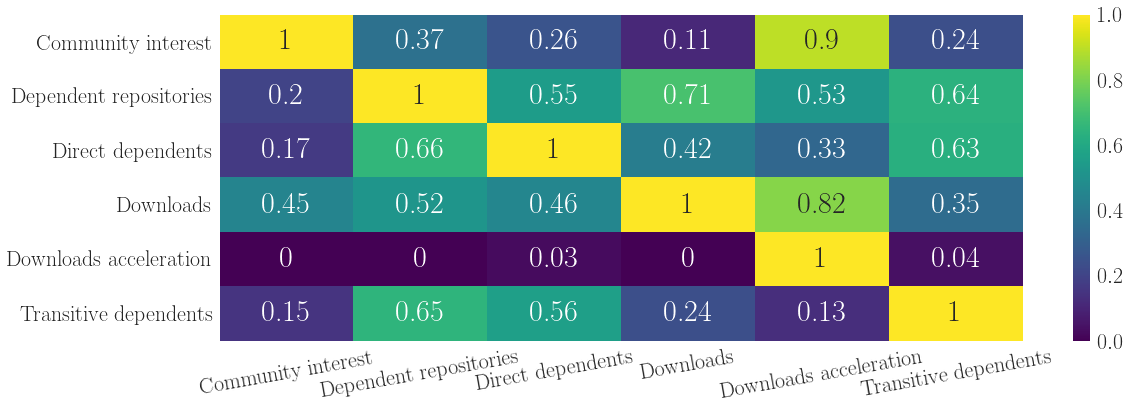

In [136]:
corr=pd.read_csv('../saner2018/csv/correlation_coef.csv', sep=';', dtype=object)
corr['correlation']=corr.correlation.apply(lambda x: float(x))
corr = corr.pivot_table(index='para1', columns='para2', values='correlation')
corr.reset_index()
ax=sns.heatmap(corr, annot=True, fmt="g", cmap='viridis')
ax.figure.set_size_inches(18,6)
ax.set_xlabel('')
plt.xticks(rotation='10')
ax.set_ylabel('')
ax.figure.savefig('../../seneca_research/MSR2018/figures/correlation.png', bbox_inches='tight', facecolor='white')

# Defining new Popularity

In [227]:
# Already prepared the data for the NPM_FINAL dataframe
normalized=pd.read_csv('../saner2018/csv/npm_packages_jan_final.csv', sep=';', dtype=object, index_col='name')
for x in normalized:
    try:
        normalized[x]=normalized[x].apply(float)
    except:
        print(x)
        pass
    
for col in ['downloadsCount','depPro','depRepo','communityInterest']:
    max1=math.log(normalized[col].max())
    try:
        min1=math.log(normalized[col].min())
    except:
        min1=0
    normalized[col]=normalized[col].apply(
        lambda x: float((math.log(x)-min1)/(max1-min1)) if x>= 1 else 0)
    

#normalized['downloadsCount']=normalized.downloadsCount.apply(lambda x: float(float(x)/max1) if x>0
 #                                                     else 0)
#normalized['depPro']=normalized.depPro.apply(lambda x: float(float(x)/max2)if x>0
 #                                                     else 0)
#normalized['depRepo']=normalized.depRepo.apply(lambda x: float(float(x)/max3) if x>0
 #                                                     else 0)
#normalized['communityInterest']=normalized.communityInterest.apply(lambda x: float(float(x)/max4) if x>0
 #                                                     else 0)



#normalized['Popularity']=(normalized['depRepo']+normalized['communityInterest']+normalized['downloadsCount']+normalized['depPro'])/4

# Cliff's Delta

In [55]:
# Cliff's Delta
from __future__ import division
 
def cliffsDelta(lst1,lst2,
                dull = [0.147, # small
                        0.33,  # medium
                        0.474 # large
                        ][0] ): 
  "Returns true if there are more than 'dull' differences"
  m, n = len(lst1), len(lst2)
  lst2 = sorted(lst2)
  j = more = less = 0
  for repeats,x in runs(sorted(lst1)):
    while j <= (n - 1) and lst2[j] <  x: 
      j += 1
    more += j*repeats
    while j <= (n - 1) and lst2[j] == x: 
      j += 1
    less += (n - j)*repeats
  d= (more - less) / (m*n)
  f=abs(d)  > dull
  print("d="+str(d)+' '+str(f))
  return abs(d)  > dull
   
def runs(lst):
  "Iterator, chunks repeated values"
  for j,two in enumerate(lst):
    if j == 0:
      one,i = two,0
    if one!=two:
      yield j - i,one
      i = j
    one=two
  yield j - i + 1,two
  
def _cliffsDelta():
  "demo function"
  lst1=[1,2,3,4,5,6,7]
  for r in [1.01,1.1,1.21, 1.5, 2]:
    lst2=map(lambda x: x*r,lst1)
    #return lst2
    print(lst2,cliffsDelta(lst1,lst2)) # should return False

# Maintenance vs Popularity

In [228]:
number_of_issues=pd.read_csv('../saner2018/csv/number_of_issues.csv',
                                sep=';', dtype=object, index_col='name')
maintainability=pd.concat([normalized,number_of_issues], axis=1)
maintainability.dropna(inplace=True)
maintainability['issues']=maintainability['issues'].apply(float)
maintainability['fixingIssues']=maintainability['issuesDistribution'].apply(float)

maintainability=maintainability.rename(columns = {'communityInterest':'Community interest','depPro':'Transitive deps','downloadsCount':'Downloads','depRepo':'Dependent repos',})

issues_age=maintainability

issues_age['type']=issues_age['issues'].apply(lambda x: 'has issues' if x!=0
                                             else "zero issues")

maintainability=maintainability.query('issues!=0')

float(len(maintainability))/float(len(normalized))


0.5187380536713613

In [231]:
number_of_issues=pd.read_csv('../saner2018/csv/number_of_issues.csv',
                                sep=';', dtype=object, index_col='name')
maintainability2=pd.concat([normalized,number_of_issues], axis=1)
maintainability2.dropna(inplace=True)
maintainability2['issues']=maintainability2['issues'].apply(float)
maintainability2['fixingIssues']=maintainability2['issuesDistribution'].apply(float)

maintainability2=maintainability2.rename(columns = {'communityInterest':'Community interest','depPro':'Transitive deps','downloadsCount':'Downloads','depRepo':'Dependent repos',})

issues_age2=maintainability2

issues_age2['type']=issues_age2['issues'].apply(lambda x: 'has issues' if x!=0
                                             else "zero issues")

maintainability2=maintainability2.query('issues!=0')

float(len(maintainability2))/float(len(normalized))


0.5187380536713613

In [276]:
for x in maintainability:
    print(x)

tests
carefulness
health
branding
communityInterest
dependentsCount
downloadsCount
downloadsAcceleration
releasesFrequency
commitsFrequency
openIssues
issuesDistribution
depPro
depRepo
releases
lastRelease
dependencies
firstRelease
size
Popularity
popular
clusters
maintenance
issues
fixingIssues
type


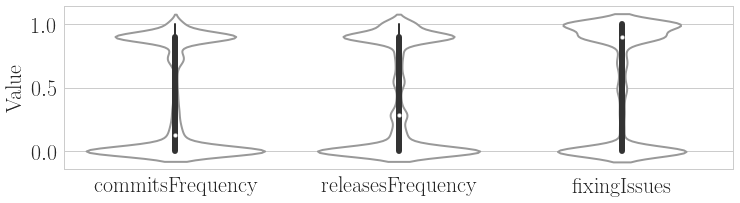

In [212]:
npm_packages_only3=maintainability.loc[:,['commitsFrequency','releasesFrequency','fixingIssues']]
#fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)

npm_packages_only3=pd.melt(npm_packages_only3)#, id_vars=['name','popularity'], value_vars=['quality','tests'])
npm_packages_only3=npm_packages_only3.rename(columns = {'variable':'metric'})
ax = sns.violinplot(y="value", x="metric", data=npm_packages_only3, color='white', saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('Value')
plt.setp(ax.lines, color=".2", mfc='.2', mec='.2')
for x in ax.artists:
    x.set_edgecolor('.1')
ax.set_xlabel('')

ax.figure.set_size_inches(12,3)
ax.figure.savefig('../../seneca_research/MSR2018/figures/maintenance.pdf', bbox_inches='tight', facecolor='white')

In [537]:
maintainability.releasesFrequency.describe().apply(lambda x: format(x, 'f'))

count    150350.000000
mean          0.421450
std           0.422847
min           0.000000
25%           0.000000
50%           0.286644
75%           0.900000
max           1.000000
Name: releasesFrequency, dtype: object

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


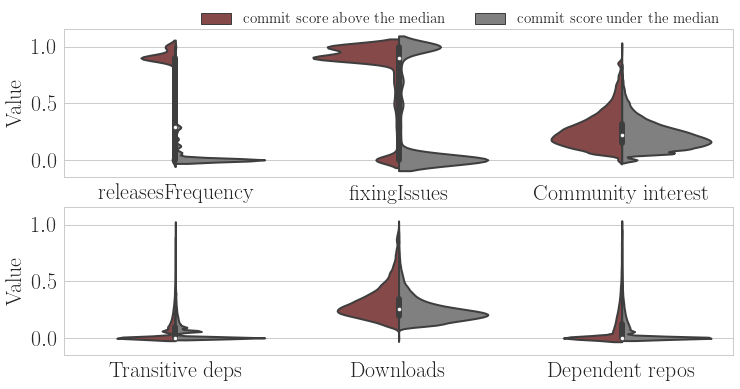

In [223]:
commit_median=maintainability.commitsFrequency.median()
maintainability['commitsGroup']=maintainability['commitsFrequency'].apply(lambda x: 'commit score under the median' if float(x)<commit_median
                                                               else 'commit score  above the median')
fig, axes = plt.subplots(2, 1, sharex=False, sharey=True)

#popularity=['Community interest','Transitive deps','Downloads','Dependent repos']

npm_packages_only3=maintainability.loc[:,['commitsGroup','releasesFrequency','fixingIssues','Community interest']]
#fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
#npm_packages_only3=npm_packages_only3.rename(columns = {'releasing':'releaseFrequency'})

npm_packages_only3=pd.melt(npm_packages_only3, id_vars=['commitsGroup'])# value_vars=['quality','tests'])
npm_packages_only3=npm_packages_only3.rename(columns = {'variable':'metric'})
ax = sns.violinplot( ax=axes[0], y="value", split=True, x="metric", hue='commitsGroup', data=npm_packages_only3, palette=['brown','gray','green','gray','orange'], saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('Value')
ax.set_xlabel('')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3, fancybox=True, shadow=True)

npm_packages_only3=maintainability.loc[:,['commitsGroup','Transitive deps','Downloads','Dependent repos']]
#fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
#npm_packages_only3=npm_packages_only3.rename(columns = {'releasing':'releaseFrequency'})

npm_packages_only3=pd.melt(npm_packages_only3, id_vars=['commitsGroup'])# value_vars=['quality','tests'])
npm_packages_only3=npm_packages_only3.rename(columns = {'variable':'metric'})
ax = sns.violinplot(ax= axes[1], y="value", split=True, x="metric", hue='commitsGroup', data=npm_packages_only3, palette=['brown','gray','green','gray','orange'], saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('Value')
ax.set_xlabel('')
ax.legend('')


ax.figure.set_size_inches(12,6)


#ax.figure.savefig('../../seneca_research/MSR2018/figures/commits_median.pdf', bbox_inches='tight', facecolor='white')

In [331]:
popularity=['Community interest','Transitive deps','Downloads','Dependent repos']
for x in popularity:
    cliffsDelta(maintainability.query('commitsFrequency >'+str(commit_median))[x],
                maintainability.query('commitsFrequency <='+str(commit_median))[x])
    print(x)

d=0.20967956757054865 True
Community interest
d=0.06920121328113998 False
Transitive deps
d=0.34283570949914277 True
Downloads
d=0.11741760779996234 False
Dependent repos


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


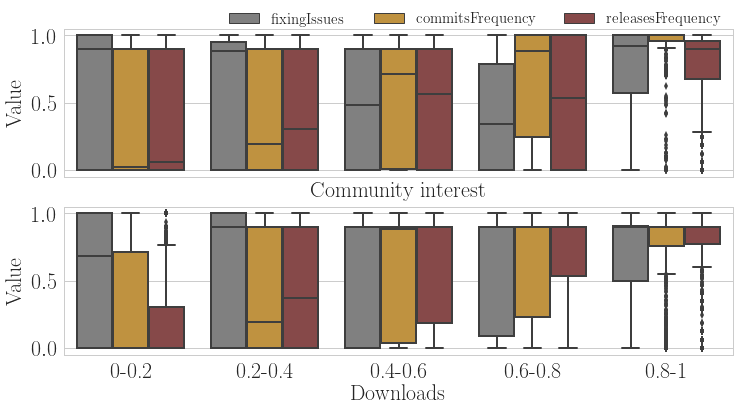

In [232]:
popularity=['Community interest','Downloads']
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)

for index, x in enumerate(popularity):
    maintainability['popular']= maintainability[x].apply(lambda x: '0' if x==0
                                                              else '0-0.2' if x <= 0.2 and x>0
                                                              else '0.2-0.4' if x <=0.4 and x > 0.2
                                                              else '0.4-0.6' if x <=0.6 and x > 0.4
                                                              else '0.6-0.8' if x <=0.8 and x > 0.6
                                                              else '0.8-1')

    npm_packages_only3=maintainability.loc[:,['commitsFrequency','releasesFrequency', 'fixingIssues','popular']]
    order=['0-0.2', '0.2-0.4','0.4-0.6','0.6-0.8', '0.8-1']

    npm_packages_only3=pd.melt(npm_packages_only3, id_vars=['popular'], value_vars=['fixingIssues','commitsFrequency','releasesFrequency'])
    npm_packages_only3=npm_packages_only3.rename(columns = {'variable':'metric'})
    ax = sns.boxplot(y="value", x="popular", hue='metric',
                        data=npm_packages_only3,
                        palette=['gray','orange','brown'], saturation=0.5, order=order, ax=axes[index])

    #fig, axes = plt.subplots(3, 1, sharex=True, sharey=True)
    #sns.violinplot(y="quality", x="popular",data=npm_packages, palette="muted", ax=axes[0], split=True, order=order)
    ax.set_ylabel('')
    ax.set_xlabel(x)
    ax.set_ylabel('Value')
    if index == 0:
        ax.legend( loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3, fancybox=True, shadow=True)
    else:
        ax.legend('')
ax.figure.set_size_inches(12,6)

#ax.figure.savefig('../../seneca_research/MSR2018/figures/popularity_releasing_commiting.pdf', bbox_inches='tight', facecolor='white')

In [238]:
popularity=['Community interest','Downloads']
maintenance=['commitsFrequency','releasesFrequency', 'fixingIssues']
for x in popularity:
    for y in maintenance:
        print(scipy.stats.kendalltau(maintainability2[x],
                                 maintainability2[y]), x, y)

KendalltauResult(correlation=0.15409487904999652, pvalue=0.0) Community interest commitsFrequency
KendalltauResult(correlation=0.1180005913274091, pvalue=0.0) Community interest releasesFrequency
KendalltauResult(correlation=-0.11268939319999251, pvalue=0.0) Community interest fixingIssues
KendalltauResult(correlation=0.23459414767138118, pvalue=0.0) Downloads commitsFrequency
KendalltauResult(correlation=0.28964375148218979, pvalue=0.0) Downloads releasesFrequency
KendalltauResult(correlation=0.027234781575142395, pvalue=4.3380389737367499e-47) Downloads fixingIssues


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


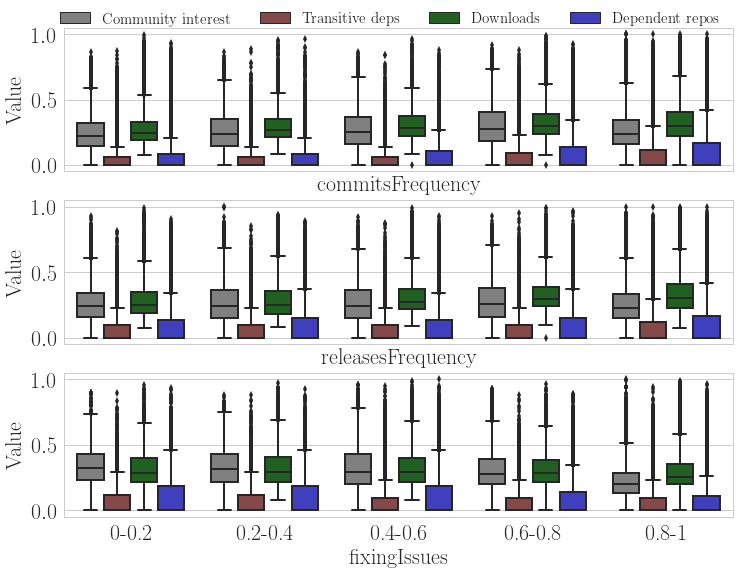

In [234]:
popularity=['Community interest','Transitive deps','Downloads','Dependent repos']
maintenance=['commitsFrequency','releasesFrequency', 'fixingIssues']
fig, axes = plt.subplots(3, 1, sharex=True, sharey=True)

for index, x in enumerate(maintenance):
    maintainability['popular']= maintainability[x].apply(lambda x: '0' if x==0
                                                              else '0-0.2' if x <= 0.2 and x>0
                                                              else '0.2-0.4' if x <=0.4 and x > 0.2
                                                              else '0.4-0.6' if x <=0.6 and x > 0.4
                                                              else '0.6-0.8' if x <=0.8 and x > 0.6
                                                              else '0.8-1')

    npm_packages_only3=maintainability.loc[:,['Community interest','Transitive deps','Downloads','Dependent repos','popular']]
    order=['0-0.2', '0.2-0.4','0.4-0.6','0.6-0.8', '0.8-1']

    npm_packages_only3=pd.melt(npm_packages_only3, id_vars=['popular'], value_vars=['Community interest','Transitive deps','Downloads','Dependent repos'])
    npm_packages_only3=npm_packages_only3.rename(columns = {'variable':'metric'})
    ax = sns.boxplot(y="value", x="popular", hue='metric',
                        data=npm_packages_only3,
                        palette=['gray','brown','green','blue'], saturation=0.5, order=order, ax=axes[index])

    #fig, axes = plt.subplots(3, 1, sharex=True, sharey=True)
    #sns.violinplot(y="quality", x="popular",data=npm_packages, palette="muted", ax=axes[0], split=True, order=order)
    ax.set_ylabel('')
    ax.set_xlabel(x)
    ax.set_ylabel('Value')
    if index == 0:
        ax.legend( loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=4, fancybox=True, shadow=True)
    else:
        ax.legend('')
ax.figure.set_size_inches(12,9)

#ax.figure.savefig('../../seneca_research/MSR2018/figures/popularity_releasing_commiting.png', bbox_inches='tight', facecolor='white')

In [318]:
popularity=['Community interest','Transitive deps','Downloads','Dependent repos']
for x in popularity:
    cliffsDelta(maintainability.query('commitsFrequency >'+str(commit_median))[x],
                maintainability.query('commitsFrequency <='+str(commit_median))[x])
    print(x)

d=0.20967956757054865 True
Community interest
d=0.06920121328113998 False
Transitive deps
d=0.34283570949914277 True
Downloads
d=0.11741760779996234 False
Dependent repos


In [147]:
normalized.communityInterest.median()

0.13271783627136488

In [148]:
scipy.stats.pearsonr(maintainability.fixingIssues,
                         maintainability.Popularity)

(-0.089160234699032323, 6.1901434836163706e-263)

Text(0.5,0,'Popularity')

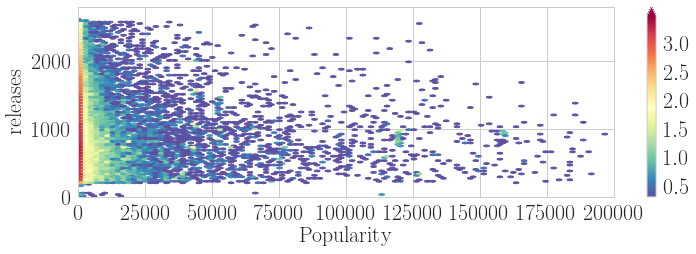

In [196]:
import math
#npm_packages_only3=maintainability.loc[:,['Popularity','releases']]

color_map = plt.cm.Spectral_r
#df=npm_packages_only3.sort_values(['communityInterest'],ascending=False)

fig=plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)

image = plt.hexbin(data=maintainability, x='size', y='firstRelease',cmap=color_map,gridsize=700,mincnt=1,bins='log')

cb = plt.colorbar(image,spacing='uniform',extend='max')


ax.figure.set_size_inches(12,3.5)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlim(0,200000)
ax.set_ylim(0,2800)
ax.set_ylabel('releases')
ax.set_xlabel('Popularity')
#ax.figure.savefig('../../seneca_research/MSR2018/figures/commit_corr_popularity.pdf', bbox_inches='tight', facecolor='white')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


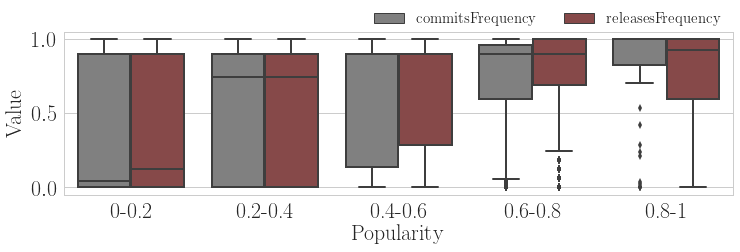

In [169]:
maintainability['popular']= maintainability['Popularity'].apply(lambda x: '0' if x==0
                                                          else '0-0.2' if x <= 0.2 and x>0
                                                          else '0.2-0.4' if x <=0.4 and x > 0.2
                                                          else '0.4-0.6' if x <=0.6 and x > 0.4
                                                          else '0.6-0.8' if x <=0.8 and x > 0.6
                                                          else '0.8-1')

npm_packages_only3=maintainability.loc[:,['commitsFrequency','releasesFrequency', 'popular']]
order=['0-0.2', '0.2-0.4','0.4-0.6','0.6-0.8', '0.8-1']

npm_packages_only3=pd.melt(npm_packages_only3, id_vars=['popular'], value_vars=['commitsFrequency','releasesFrequency'])
npm_packages_only3=npm_packages_only3.rename(columns = {'variable':'metric'})
ax = sns.boxplot(y="value", x="popular", hue='metric',
                    data=npm_packages_only3,
                    palette=['gray','brown'], saturation=0.5, order=order)

#fig, axes = plt.subplots(3, 1, sharex=True, sharey=True)
#sns.violinplot(y="quality", x="popular",data=npm_packages, palette="muted", ax=axes[0], split=True, order=order)
ax.figure.set_size_inches(12,3)
ax.set_ylabel('')
ax.set_xlabel('Popularity')
ax.set_ylabel('Value')
ax.legend( loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3, fancybox=True, shadow=True)
ax.figure.savefig('../../seneca_research/MSR2018/figures/popularity_releasing_commiting.png', bbox_inches='tight', facecolor='white')

In [219]:
issues_age.head()

,tests,carefulness,health,branding,communityInterest,dependentsCount,downloadsCount,downloadsAcceleration,releasesFrequency,commitsFrequency,...,dependencies,firstRelease,size,Popularity,maintenance,issues,fixingIssues,type,type2,clusters
003,0.000000,0.56085,1.00,0.00,0.090594,0.0,0.206919,0.421328,0.9,0.9,...,0.0,636.0,5.86,0.074378,0.99,1.0,1.0,has issues,1,0
007,0.850000,0.16500,1.00,0.00,0.262069,0.0,0.292362,0.658904,0.0,0.0,...,0.0,1631.0,75.20,0.138608,0.16,3.0,0.0,has issues,1,0
0126af95c0e2d9b0a7c78738c4c00a860b04acc8,0.383667,0.92000,0.75,0.15,0.211511,0.0,0.209573,0.132858,0.9,0.9,...,1.0,808.0,121.00,0.105271,0.99,0.0,0.9,zero issues,0,1
09aac0b7d986b720253a65a47d1fd3d9,0.000000,0.67675,1.00,0.30,0.057158,0.0,0.172232,0.068855,0.0,0.0,...,0.0,638.0,1.95,0.057348,0.49,0.0,0.7,zero issues,0,1
0model,0.600000,0.35500,1.00,0.40,0.090594,0.0,0.314562,1.352131,0.0,0.0,...,0.0,1046.0,42.00,0.101289,0.85,0.0,0.7,zero issues,0,1


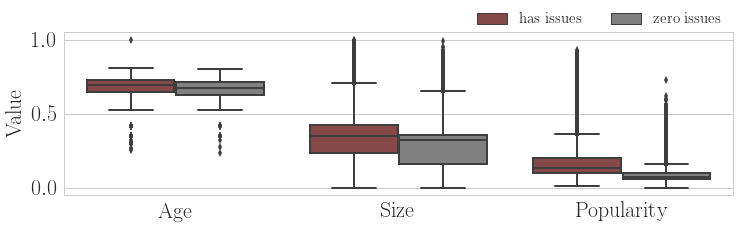

In [251]:

npm_packages_only3=issues_age.loc[:,['type','firstRelease','size','Popularity']]

max1=npm_packages_only3.firstRelease.max()
max2=npm_packages_only3['size'].max()

npm_packages_only3['Age']=npm_packages_only3.firstRelease.apply(lambda x: float((math.log(float(x)))/(math.log(max1))) if x>0
                                                      else 0)
npm_packages_only3['Size']=npm_packages_only3['size'].apply(lambda x: float((math.log(float(x)))/(math.log(max2))) if x>0
                                                      else 0)
npm_packages_only3=npm_packages_only3.loc[:,['type','Age','Size','Popularity']]

#fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
#npm_packages_only3=npm_packages_only3.rename(columns = {'releasing':'releaseFrequency'})

npm_packages_only3_melted=pd.melt(npm_packages_only3, id_vars=['type'])# value_vars=['quality','tests'])
npm_packages_only3_melted=npm_packages_only3_melted.rename(columns = {'variable':'metric'})
ax = sns.boxplot(y="value", x="metric", hue='type', data=npm_packages_only3_melted, palette=['brown','gray','green','gray','orange'], saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('Value')
ax.set_xlabel('')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3, fancybox=True, shadow=True)
ax.figure.set_size_inches(12,3)
ax.figure.savefig('../../seneca_research/MSR2018/figures/zero_issues.pdf', bbox_inches='tight', facecolor='white')

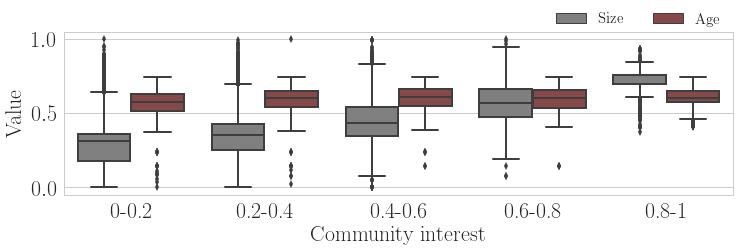

In [67]:

npm_packages_only3=issues_age.loc[:,['type','firstRelease','size','Community interest','Transitive deps','Downloads','Dependent repos']]


max1=math.log(npm_packages_only3['size'].max())
try:
    min1=math.log(npm_packages_only3['size'].min())
except:
    min1=0
    
max2=math.log(npm_packages_only3['firstRelease'].max())
try:
    min2=math.log(npm_packages_only3['firstRelease'].min())
except:
    min2=0


npm_packages_only3['Size']=npm_packages_only3['size'].apply(
    lambda x: float((math.log(x)-min1)/(max1-min1)) if x>= 1 else 0)
npm_packages_only3['Age']=npm_packages_only3.firstRelease.apply(
    lambda x: float((math.log(x)-min2)/(max2-min2)) if x>= 1 else 0)



popularity=['Community interest','Transitive deps','Downloads','Dependent repos']
fig, axes = plt.subplots(1, 1, sharex=True, sharey=True)

for index, x in enumerate(['Community interest']):
    npm_packages_only3['popular']= npm_packages_only3[x].apply(lambda x: '0' if x==0
                                                              else '0-0.2' if x <= 0.2 and x>0
                                                              else '0.2-0.4' if x <=0.4 and x > 0.2
                                                              else '0.4-0.6' if x <=0.6 and x > 0.4
                                                              else '0.6-0.8' if x <=0.8 and x > 0.6
                                                              else '0.8-1')

    npm_packages_only4=npm_packages_only3.loc[:,['Size', 'Age','popular']]
    order=['0-0.2', '0.2-0.4','0.4-0.6','0.6-0.8', '0.8-1']

    npm_packages_only4=pd.melt(npm_packages_only4, id_vars=['popular'], value_vars=['Size','Age'])
    npm_packages_only4=npm_packages_only4.rename(columns = {'variable':'metric'})
    ax = sns.boxplot(y="value", x="popular", hue='metric',
                        data=npm_packages_only4,
                        palette=['gray','brown','green'], saturation=0.5, order=order)

    #fig, axes = plt.subplots(3, 1, sharex=True, sharey=True)
    #sns.violinplot(y="quality", x="popular",data=npm_packages, palette="muted", ax=axes[0], split=True, order=order)
    ax.set_ylabel('')
    ax.set_xlabel(x)
    ax.set_ylabel('Value')
    if index == 0:
        ax.legend( loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3, fancybox=True, shadow=True)
    else:
        ax.legend('')
    break
ax.figure.set_size_inches(12,3)

ax.figure.savefig('../../seneca_research/MSR2018/figures/size_age_community.pdf', bbox_inches='tight', facecolor='white')

In [410]:
popularity=['Community interest','Transitive deps','Downloads','Dependent repos']
maintenance=['Size','Age']
for x in popularity:
    for y in maintenance:
        print(scipy.stats.spearmanr(npm_packages_only3[x],
                                 npm_packages_only3[y]), x, y)

SpearmanrResult(correlation=0.34441166220471525, pvalue=0.0) Community interest Size
SpearmanrResult(correlation=0.16990182521339778, pvalue=0.0) Community interest Age
SpearmanrResult(correlation=0.1234199956823656, pvalue=0.0) Transitive deps Size
SpearmanrResult(correlation=0.37316958544681594, pvalue=0.0) Transitive deps Age
SpearmanrResult(correlation=0.17111852994714849, pvalue=0.0) Downloads Size
SpearmanrResult(correlation=0.065813511846625664, pvalue=1.4231510897913978e-275) Downloads Age
SpearmanrResult(correlation=0.13468813411127337, pvalue=0.0) Dependent repos Size
SpearmanrResult(correlation=0.32170028538369816, pvalue=0.0) Dependent repos Age


In [68]:
popularity=['Community interest','Transitive deps','Downloads','Dependent repos']
for x in popularity:
    cliffsDelta(issues_age.query('type=="has issues"')[x], 
            issues_age.query('type=="zero issues"')[x])
    print(x)

d=0.6662407893473002 True
Community interest
d=0.2006203581964786 True
Transitive deps
d=0.4451331293262879 True
Downloads
d=0.2756903606065468 True
Dependent repos


In [360]:
npm_packages.firstRelease.min()

10.0

In [370]:
float((math.log(float(10))))

2.302585092994046

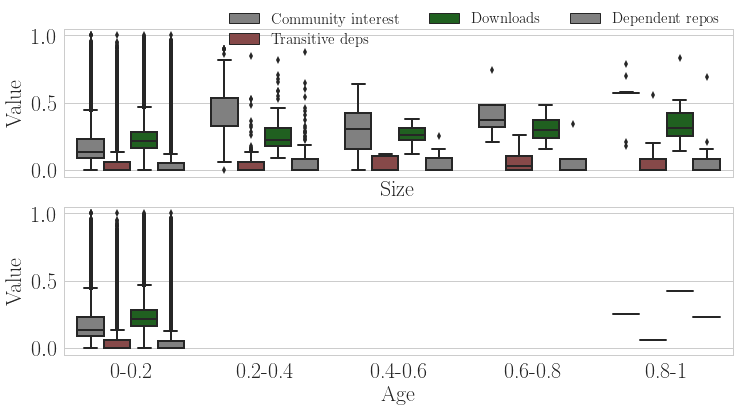

In [362]:

npm_packages_only3=issues_age.loc[:,['firstRelease','size','Community interest','Transitive deps','Downloads','Dependent repos']]

max1=npm_packages_only3.firstRelease.max()
max2=npm_packages_only3['size'].max()

#npm_packages_only3['Age']=npm_packages_only3.firstRelease.apply(lambda x: float((math.log(float(x)))/(math.log(max1))) if x>0
 #                                                     else 0)
#npm_packages_only3['Size']=npm_packages_only3['size'].apply(lambda x: float((math.log(float(x)))/(math.log(max2))) if x>0
#                                                      else 0)

npm_packages_only3['Age']=npm_packages_only3.firstRelease.apply(lambda x: float(float(x)/max1) if x>0
                                                      else 0)
npm_packages_only3['Size']=npm_packages_only3['size'].apply(lambda x: float(float(x)/max2) if x>0
                                                      else 0)


popularity=['Community interest','Transitive deps','Downloads','Dependent repos']

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)

for index, x in enumerate(['Size','Age']):
    npm_packages_only3['popular']= npm_packages_only3[x].apply(lambda x: '0' if x==0
                                                              else '0-0.2' if x <= 0.2 and x>0
                                                              else '0.2-0.4' if x <=0.4 and x > 0.2
                                                              else '0.4-0.6' if x <=0.6 and x > 0.4
                                                              else '0.6-0.8' if x <=0.8 and x > 0.6
                                                              else '0.8-1')

    npm_packages_only4=npm_packages_only3.loc[:,['Community interest','Transitive deps','Downloads','Dependent repos','popular']]
    order=['0-0.2', '0.2-0.4','0.4-0.6','0.6-0.8', '0.8-1']

    npm_packages_only4=pd.melt(npm_packages_only4, id_vars=['popular'], value_vars=['Community interest','Transitive deps','Downloads','Dependent repos'])
    npm_packages_only4=npm_packages_only4.rename(columns = {'variable':'metric'})
    ax = sns.boxplot(y="value", x="popular", hue='metric',
                        data=npm_packages_only4,
                        palette=['gray','brown','green'], saturation=0.5, order=order, ax=axes[index])

    #fig, axes = plt.subplots(3, 1, sharex=True, sharey=True)
    #sns.violinplot(y="quality", x="popular",data=npm_packages, palette="muted", ax=axes[0], split=True, order=order)
    ax.set_ylabel('')
    ax.set_xlabel(x)
    ax.set_ylabel('Value')
    if index == 0:
        ax.legend( loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3, fancybox=True, shadow=True)
    else:
        ax.legend('')
ax.figure.set_size_inches(12,6)

#ax.figure.savefig('../../seneca_research/MSR2018/figures/zero_issues.pdf', bbox_inches='tight', facecolor='white')

In [358]:
len(npm_packages_only3.query('Age>0.2'))

289838

In [344]:
npm_packages_only4.head()

,popular,metric,value
0,0-0.2,Size,0.124908
1,0.2-0.4,Size,0.305190
2,0.4-0.6,Size,0.653724
3,0-0.2,Size,0.189396
4,0-0.2,Size,0.189396


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


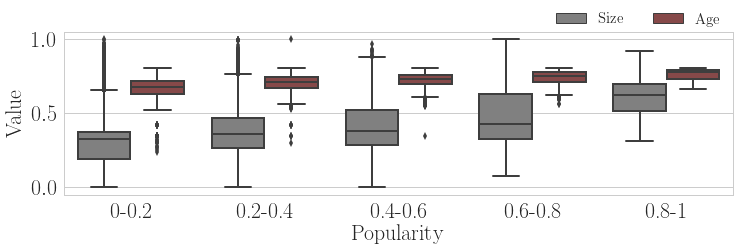

In [91]:
issues_age['popular']= issues_age['Popularity'].apply(lambda x: '0' if x==0
                                                          else '0-0.2' if x <= 0.2 and x>0
                                                          else '0.2-0.4' if x <=0.4 and x > 0.2
                                                          else '0.4-0.6' if x <=0.6 and x > 0.4
                                                          else '0.6-0.8' if x <=0.8 and x > 0.6
                                                          else '0.8-1')

npm_packages_only3=issues_age.loc[:,['firstRelease','size','popular']]
max1=npm_packages_only3.firstRelease.max()
max2=npm_packages_only3['size'].max()

npm_packages_only3['Age']=npm_packages_only3.firstRelease.apply(lambda x: float((math.log(float(x)))/(math.log(max1))) if x>0
                                                      else 0)
npm_packages_only3['Size']=npm_packages_only3['size'].apply(lambda x: float((math.log(float(x)))/(math.log(max2))) if x>0
                                                      else 0)
npm_packages_only3=npm_packages_only3.loc[:,['type','Age','Size','popular']]

order=['0-0.2', '0.2-0.4','0.4-0.6','0.6-0.8', '0.8-1']

npm_packages_only3_melted=pd.melt(npm_packages_only3, id_vars=['popular'], value_vars=['Size','Age'])
npm_packages_only3_melted=npm_packages_only3_melted.rename(columns = {'variable':'metric'})
ax = sns.boxplot(y="value", x="popular", hue='metric',
                    data=npm_packages_only3_melted,
                    palette=['gray','brown'], saturation=0.5, order=order)

#fig, axes = plt.subplots(3, 1, sharex=True, sharey=True)
#sns.violinplot(y="quality", x="popular",data=npm_packages, palette="muted", ax=axes[0], split=True, order=order)
ax.figure.set_size_inches(12,3)
ax.set_ylabel('')
ax.set_xlabel('Popularity')
ax.set_ylabel('Value')
ax.legend( loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3, fancybox=True, shadow=True)

In [169]:
scipy.stats.pearsonr(issues_age['firstRelease'],
                         issues_age.Popularity)



(0.26625391080794558, 0.0)

In [170]:
scipy.stats.spearmanr(issues_age['firstRelease'],
                         issues_age.Popularity)

SpearmanrResult(correlation=0.23119708851217766, pvalue=0.0)

In [159]:
scipy(npm_packages_only3.query('type == "has issues"').Age,
                         npm_packages_only3.query('type == "zero issues"').Age)

d=0.14343328712510145 False


False

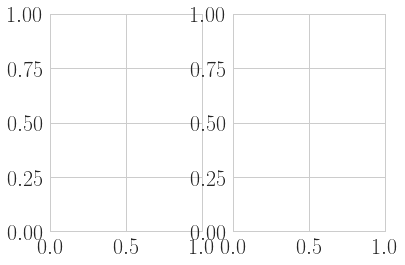

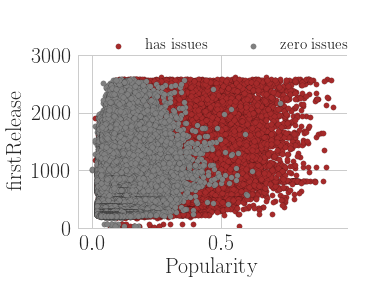

In [153]:

npm_packages_only3=issues_age.loc[:,['firstRelease','size','Popularity','type']]
max1=npm_packages_only3.firstRelease.max()
max2=npm_packages_only3['size'].max()

npm_packages_only3['Age']=npm_packages_only3.firstRelease.apply(lambda x: float((math.log(float(x)))/(math.log(max1))) if x>0
                                                      else 0)
npm_packages_only3['Size']=npm_packages_only3['size'].apply(lambda x: float((math.log(float(x)))/(math.log(max2))) if x>0
                                                      else 0)
npm_packages_only3=npm_packages_only3.loc[:,['type','Age','Size','Popularity']]

fig, axez = plt.subplots(1, 2, sharex=False, sharey=False)


sns.color_palette("RdBu", n_colors=30)
kws = dict(s=30, linewidth=0.1, edgecolor="black")
g = sns.FacetGrid(issues_age, hue="type", palette=['brown','gray'], size=8)
g = (g.map(plt.scatter, "Popularity", "firstRelease", **kws))
axes = g.axes
g.fig.set_size_inches(5,3)
g.fig.legend( loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3)
g.set(ylim=(0,3000))


# Other Software development metrics (quality)

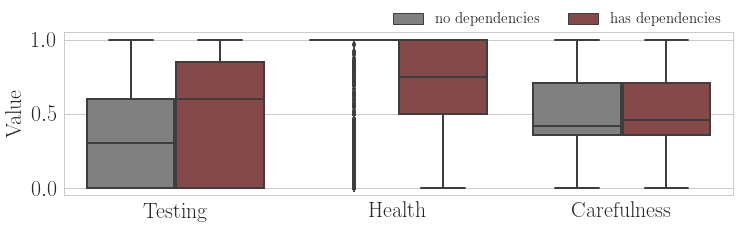

In [240]:
# Melted a new dataframe
normalized=normalized.rename(columns = {'communityInterest':'Community interest','depPro':'Transitive deps','downloadsCount':'Downloads','depRepo':'Dependent repos',})
normalized=normalized.rename(columns = {'tests':'Testing', 'health':'Health' , 'carefulness':'Carefulness'})

npm_packages_only3=normalized.loc[:,['Testing','Health','Carefulness','dependencies']]
#npm_packages_only3=npm_packages_only3.rename(columns = {'tests':'Testing', 'health':'Health' , 'carefulness':'Carefulness'})
npm_packages_only3['dependencies']=npm_packages_only3['dependencies'].apply(lambda x: 'has dependencies' if int(x)>0
                                                                              else 'no dependencies')
#melt the dataframe
npm_packages_only3=pd.melt(npm_packages_only3, id_vars=['dependencies'])# value_vars=['quality','tests'])
npm_packages_only3=npm_packages_only3.rename(columns = {'variable':'metric'})
ax = sns.boxplot(y="value", x="metric", hue="dependencies",  data=npm_packages_only3, palette=['gray','brown','green','gray'], saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('Value')
ax.set_xlabel('')
ax.legend( loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3, fancybox=True, shadow=True)
ax.figure.set_size_inches(12,3)
#ax.figure.savefig('../../seneca_research/MSR2018/figures/software_params.pdf', bbox_inches='tight', facecolor='white')

In [248]:
npm_packages_only3.query('dependencies=="no dependencies" and metric=="Carefulness"').value.median()

0.42

In [71]:
cliffsDelta(npm_packages_only3.query('dependencies=="has dependencies" and metric=="Carefulness"').value,
                        npm_packages_only3.query('dependencies=="no dependencies" and metric=="Carefulness"').value)

d=0.04004815932570378 False


False

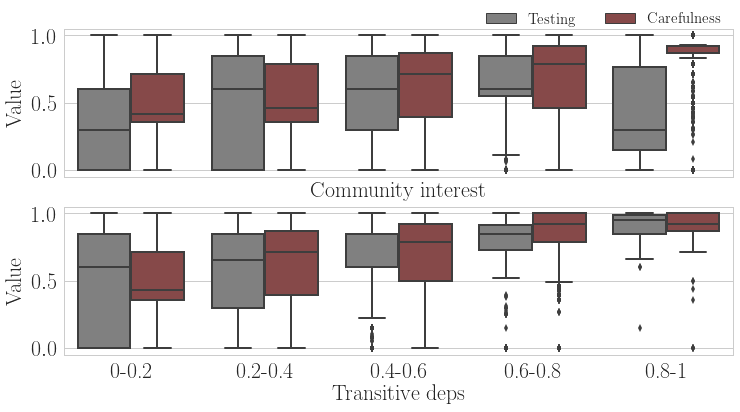

In [241]:

popularity=['Community interest','Transitive deps']

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)

for index, x in enumerate(popularity):
    normalized['popular']= normalized[x].apply(lambda x: '0' if x==0
                                                              else '0-0.2' if x <= 0.2 and x>0
                                                              else '0.2-0.4' if x <=0.4 and x > 0.2
                                                              else '0.4-0.6' if x <=0.6 and x > 0.4
                                                              else '0.6-0.8' if x <=0.8 and x > 0.6
                                                              else '0.8-1')

    npm_packages_only3=normalized.loc[:,['Testing', 'Carefulness','popular']]
    order=['0-0.2', '0.2-0.4','0.4-0.6','0.6-0.8', '0.8-1']

    npm_packages_only3=pd.melt(npm_packages_only3, id_vars=['popular'], value_vars=['Testing','Carefulness'])
    npm_packages_only3=npm_packages_only3.rename(columns = {'variable':'metric'})
    ax = sns.boxplot(y="value", x="popular", hue='metric',
                        data=npm_packages_only3,
                        palette=['gray','brown','green'], saturation=0.5, order=order, ax=axes[index])

    #fig, axes = plt.subplots(3, 1, sharex=True, sharey=True)
    #sns.violinplot(y="quality", x="popular",data=npm_packages, palette="muted", ax=axes[0], split=True, order=order)
    ax.set_ylabel('')
    ax.set_xlabel(x)
    ax.set_ylabel('Value')
    if index == 0:
        ax.legend( loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3, fancybox=True, shadow=True)
    else:
        ax.legend('')
ax.figure.set_size_inches(12,6)

#ax.figure.savefig('../../seneca_research/MSR2018/figures/popularity_soft_params.png', bbox_inches='tight', facecolor='white')

In [244]:
popularity=['Community interest','Transitive deps','Downloads','Dependent repos']
maintenance=['Carefulness','Testing']
for x in popularity:
    for y in maintenance:
        print(scipy.stats.kendalltau(normalized[x],
                                 normalized[y]), x, y)

KendalltauResult(correlation=0.15032929587647581, pvalue=0.0) Community interest Carefulness
KendalltauResult(correlation=0.14498704899311149, pvalue=0.0) Community interest Testing
KendalltauResult(correlation=0.063712214570419229, pvalue=0.0) Transitive deps Carefulness
KendalltauResult(correlation=0.15986868469883259, pvalue=0.0) Transitive deps Testing
KendalltauResult(correlation=0.18868520942493167, pvalue=0.0) Downloads Carefulness
KendalltauResult(correlation=0.17164805282095655, pvalue=0.0) Downloads Testing
KendalltauResult(correlation=0.086153587766732001, pvalue=0.0) Dependent repos Carefulness
KendalltauResult(correlation=0.16168147058467847, pvalue=0.0) Dependent repos Testing


In [515]:
normalized[normalized['Community interest']>0.8].Testing.median()

0.3

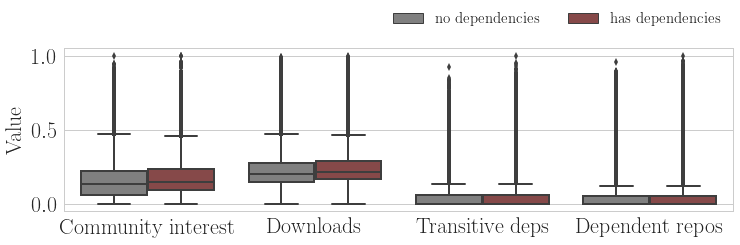

In [520]:
npm_packages_only3=normalized.loc[:,['Community interest','Downloads','Transitive deps','Dependent repos','dependencies']]
#npm_packages_only3=npm_packages_only3.rename(columns = {'tests':'Testing', 'health':'Health' , 'carefulness':'Carefulness'})
npm_packages_only3['dependencies']=npm_packages_only3['dependencies'].apply(lambda x: 'has dependencies' if int(x)>0
                                                                              else 'no dependencies')

npm_packages_only3=pd.melt(npm_packages_only3, id_vars=['dependencies'], value_vars=['Community interest','Downloads','Transitive deps','Dependent repos'])
npm_packages_only3=npm_packages_only3.rename(columns = {'variable':'metric'})
ax = sns.boxplot(y="value", x="metric", hue='dependencies',
                    data=npm_packages_only3,
                    palette=['gray','brown','green'], saturation=0.5)

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_ylabel('Value')
ax.legend( loc='upper right', bbox_to_anchor=(1, 1.3), fontsize=15,ncol=4, fancybox=True, shadow=True)
ax.figure.set_size_inches(12,3)

In [521]:
npm_packages_only3.head()

,dependencies,metric,value
0,no dependencies,Community interest,0.262069
1,has dependencies,Community interest,0.233633
2,has dependencies,Community interest,0.610120
3,has dependencies,Community interest,0.368269
4,no dependencies,Community interest,0.090594


In [531]:
popularity=['Community interest','Transitive deps','Downloads','Dependent repos']
for x in popularity:
    cliffsDelta(npm_packages_only3.query('dependencies=="no dependencies" and metric=="'+x+'"').value,
                npm_packages_only3.query('dependencies=="has dependencies" and metric=="'+x+'"').value)

d=-0.06443743849492233 False
d=-0.037723638157577566 False
d=-0.07934389243431132 False
d=-0.012241099042358042 False


In [ ]:
npm_packages_only3=npm_packages.loc[:,['downloadsCount','depRepo','downloadsAcceleration', 'communityInterest']]
max1=npm_packages_only3.downloadsCount.max()
max2=npm_packages_only3.depRepo.max()
max3=npm_packages_only3.downloadsAcceleration.max()
max4=npm_packages_only3.communityInterest.max()


npm_packages_only3['downloadsCount']=npm_packages_only3.downloadsCount.apply(lambda x: float((math.log(int(x)))/(math.log(max1))) if x>0
                                                      else 0)
npm_packages_only3['depRepo']=npm_packages_only3.depRepo.apply(lambda x: float((math.log(int(x)))/(math.log(max2))) if x>0
                                                      else 0)
npm_packages_only3['downloadsAcceleration']=npm_packages_only3.downloadsAcceleration.apply(lambda x: float((math.log(float(x)))/(math.log(max3))) if x>0
                                                      else 0)
npm_packages_only3['communityInterest']=npm_packages_only3.communityInterest.apply(lambda x: float((math.log(float(x)))/(math.log(max4))) if x>0
                                                      else 0)

In [9]:
issues_age['type2']=issues_age['issues'].apply(lambda x: 1 if x!=0
                                             else 0)

In [376]:
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import math

max1=normalized.firstRelease.max()
max2=normalized['size'].max()

normalized['Age']=normalized.firstRelease.apply(lambda x: float((math.log(float(x)))/(math.log(max1))) if x>0
                                                      else 0)
normalized['Size']=normalized['size'].apply(lambda x: float((math.log(float(x)))/(math.log(max2))) if x>0
                                                      else 0)
#Make a copy of DF

#Transsform the timeOfDay to dummies
#df_tr = pd.get_dummies(df_tr, columns=['timeOfDay'])
df_tr=normalized
#Standardize
#clmns = ['downloadsCount', 'depRepo','downloadsAcceleration', 'communityInterest']
#clmns = ['openIssues','issuesDistribution','commitsFrequency','releasesFrequency']
clmns = ['firstRelease','Popularity']

df_tr_std = stats.zscore(df_tr[clmns])

#Cluster the data
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_tr_std)
#kmeans = DBSCAN().fit(df_tr_std)

labels = kmeans.labels_

#Glue back to originaal data
df_tr['clusters'] = labels

#Add the column into our list
clmns.extend(['clusters'])

#Lets analyze the clusters
print(df_tr[clmns].groupby(['clusters']).mean())


          firstRelease  Popularity
clusters                          
0          1422.411028    0.199161
1           646.110098    0.097245


In [ ]:
normalized.

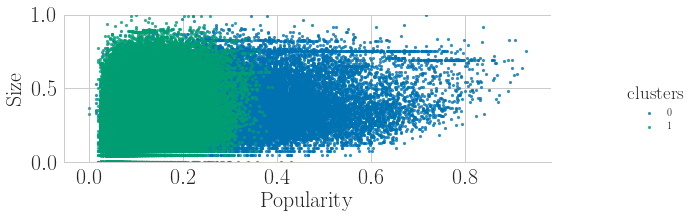

In [378]:
#Scatter plot of Wattage and Duration


ax=sns.lmplot('Popularity', 'Size', 
           data=df_tr, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 10})
ax.set(ylim=(0,1))
ax.fig.set_size_inches(12,3)

In [82]:
npm_packages.query('depPro==0').sort_values(['communityInterest'], ascending=False)

,tests,carefulness,health,branding,communityInterest,dependentsCount,downloadsCount,downloadsAcceleration,releasesFrequency,commitsFrequency,openIssues,issuesDistribution,depPro,depRepo,releases,lastRelease,dependencies,firstRelease,size
name,,,,,,,,,,,,,,,,,,,
rosariociudad-bootstrap,0.60000,1.000000,1.000000,0.85,183622.0,0.0,43.666667,-0.367314,0.286644,1.000000,1.000000,0.893475,0.0,0.0,4.0,427.0,2.0,428.0,101273.60
democracyos-bootstrap,0.60000,1.000000,1.000000,0.85,183621.0,0.0,86.666667,-0.400647,0.286644,1.000000,1.000000,0.893475,0.0,1.0,2.0,438.0,2.0,438.0,101273.60
react-native-git-upgrade,0.30000,0.460000,0.636364,0.00,74944.0,0.0,6189.000000,-7.160008,0.471575,1.000000,1.000000,0.653528,0.0,6.0,10.0,326.0,11.0,417.0,141312.00
jquery-compat,0.60000,0.000000,1.000000,0.40,65395.0,0.0,30.333333,0.003139,0.000000,0.948877,1.000000,0.774495,0.0,4.0,1.0,914.0,0.0,914.0,26726.40
html5-boilerplate,0.85000,1.000000,1.000000,0.70,51684.0,2.0,1536.666667,1.759798,0.900000,0.900000,1.000000,0.900000,0.0,11.0,4.0,470.0,0.0,470.0,13209.60
socket.io-agilelaw,0.60000,0.270000,0.000000,0.40,47226.0,0.0,43.333333,-0.372717,0.000000,0.726849,1.000000,0.000000,0.0,1.0,8.0,983.0,4.0,1886.0,11878.40
future-redux,0.60000,0.500000,1.000000,0.40,47179.0,0.0,13.000000,-0.216553,0.246575,1.000000,1.000000,0.932284,0.0,0.0,2.0,365.0,4.0,366.0,5038.08
ajs-dev-socket.io-edited,0.60000,0.556500,0.000000,0.00,47080.0,0.0,23.333333,-0.746937,0.246575,0.728493,1.000000,0.000000,0.0,1.0,2.0,376.0,7.0,376.0,11878.40
meteor-tools,0.48750,0.870000,0.000000,0.00,45906.0,0.0,50.666667,0.038033,0.000000,1.000000,1.000000,0.130281,0.0,1.0,2.0,606.0,34.0,606.0,65433.60
